# DL - homework assignment 1

In this homework assignment, you are requested to implement a full backprop algorithm using only *numpy*.

- We assume sigmoid activation across all layers.
- We assume a single value in the output layer

In [ ]:
import numpy as np
np.random.seed(42)

In [ ]:
# warnings
import warnings
warnings.filterwarnings(action='ignore')

The following class represents a simple feed forward network with multiple layers. The network class provides methods for running forward and backward for a single instance, throught the network. You should implement the methods (indicated with TODO), that performs forward and backward for an entire batch. Note, the idea is to use matrix multiplications, and not running standard loops over the instances in the batch.

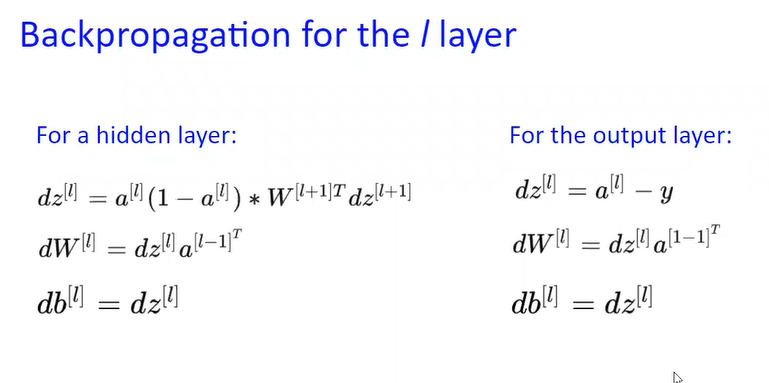


# Part 1 - class MyNN

In [ ]:
class MyNN:
  def __init__(self, learning_rate, layer_sizes):
    '''
    learning_rate - the learning to use in backward
    layer_sizes - a list of numbers, each number repreents the nuber of neurons
                  to have in every layer. Therfore, the length of the list 
                  represents the number layers this network has.
    '''
    self.learning_rate = learning_rate
    self.layer_sizes = layer_sizes
    self.model_params = {}
    self.memory = {}
    self.grads = {}
    
    # Initializing weights
    for layer_index in range(len(layer_sizes) - 1):
      W_input = layer_sizes[layer_index + 1]
      W_output = layer_sizes[layer_index]
      self.model_params['W_' + str(layer_index + 1)] = np.random.randn(W_input, W_output) * 0.1
      self.model_params['b_' + str(layer_index + 1)] = np.random.randn(W_input) * 0.1
      
      
  def forward_single_instance(self, x):    
    a_i_1 = x
    self.memory['a_0'] = x
    for layer_index in range(1,len(self.layer_sizes)):
      W_i = self.model_params['W_' + str(layer_index)]
      b_i = self.model_params['b_' + str(layer_index)]
      z_i = np.dot(W_i, a_i_1) + b_i
      a_i = 1/(1+np.exp(-z_i))
      self.memory['a_' + str(layer_index)] = a_i
      a_i_1 = a_i
    return a_i_1
  
  
  def log_loss(self, y_hat, y):
    '''
    Logistic loss, assuming a single value in y_hat and y.
    '''
    m = y_hat[0]
    cost = -y[0]*np.log(y_hat[0]) - (1 - y[0])*np.log(1 - y_hat[0])
    return cost
  
  
  def backward_single_instance(self, y):
    #output layer
    a_output = self.memory['a_' + str(len(self.layer_sizes) - 1)]
    dz = a_output - y
    
    for layer_index in range(len(self.layer_sizes) - 1, 0, -1):
      # print('backward_single_instance ',layer_index)
      
      a_l_1 = self.memory['a_' + str(layer_index - 1)]
      dW = np.dot(dz.reshape(-1, 1), a_l_1.reshape(1, -1))
      db = dz # added
      self.grads['dW_' + str(layer_index)] = dW
      self.grads['db_' + str(layer_index)] = db #added
      W_l = self.model_params['W_' + str(layer_index)]
      dz = (a_l_1 * (1 - a_l_1)).reshape(-1, 1) * np.dot(W_l.T, dz.reshape(-1, 1))
      # TODO: calculate and memorize db as well.


  # TODO: update weights with grads
  def update(self): 
    for i in range(len(self.layer_sizes)-1):
      self.model_params['W_' + str(i + 1)] -= self.learning_rate*self.grads['dW_' + str(i + 1)]
      self.model_params['b_' + str(i + 1)] -= self.learning_rate*self.grads['db_' + str(i + 1)]
  
  # TODO: implement forward for a batch X.shape = (network_input_size, number_of_instance)
  def forward_batch(self, X):
    # input layer
    self.memory['a_0'] = X

    # hidden layers 
    for i in range(1,len(self.layer_sizes)):
      W_i = self.model_params['W_' + str(i)]
      b_i = self.model_params['b_' + str(i)]
      X = np.dot(W_i,X) + b_i[:, np.newaxis] ### maybe (W_i @ X) would be better
      X = self.sigmoid(X)
      self.memory['a_' + str(i)] = X  
    return X


  def sigmoid(self,x):
      return 1/(1 + np.exp(-x))


  def dsigmoid(self,x):
      return x * (1 - x)


  # TODO: implement backward for a batch y.shape = (1, number_of_instance)
  def backward_batch(self,y):
    dz = self.memory['a_' + str(len(self.layer_sizes)-1)] - y

    for i in range(len(self.layer_sizes)-1,0,-1):
        a = self.memory['a_' + str(i-1)]
        
        # get grads and average by batch
        self.grads['dW_' + str(i)] = (dz @ a.T) / y.shape[1]
        self.grads['db_' + str(i)] = np.sum(dz,axis=1) / y.shape[1]
        
        
        # get the layer's loss and get the activation derivative
        dz = self.dsigmoid(a)*(self.model_params['W_' + str(i)].T @ dz) 
        

  # TODO: implement log_loss_batch, for a batch of instances
  def log_loss_batch(self,y_hat_batch,y_batch): 
      # return self.log_loss(y_hat_batch,y_batch).mean()
      m = y_hat_batch.shape[1]
      cost = -1 / m * (np.dot(y_batch, np.log(y_hat_batch).T) + np.dot(1 - y_batch, np.log(1 - y_hat_batch).T))
      return np.squeeze(cost)    


  def log_loss(self, y_hat, y):
    '''
    Logistic loss, assuming a single value in y_hat and y.
    '''
    return -y[0] * np.log(y_hat[0]) - (1 - y[0]) * np.log(1 - y_hat[0])
           

model params:

In [ ]:
nn = MyNN(0.01, [3, 2, 1])
nn.model_params

{'W_1': array([[ 0.04967142, -0.01382643,  0.06476885],
        [ 0.15230299, -0.02341534, -0.0234137 ]]),
 'W_2': array([[-0.04694744,  0.054256  ]]),
 'b_1': array([0.15792128, 0.07674347]),
 'b_2': array([-0.04634177])}

single instance forward:

In [ ]:
x = np.random.randn(3)
y = np.random.randn(1)
nn.forward_single_instance(x)

array([0.48946])

single instance backward:

In [ ]:
nn.backward_single_instance(y)

**Train function:**  
we added "verbose" due to the second section (100 epochs)

In [ ]:
def train(X, y, epochs, batch_size,verbose=True):
  '''
  Train procedure, please note the TODOs inside
  '''
  history = []
  for e in range(1, epochs + 1):
    epoch_loss = 0

    # TODO: shuffle
    indices = np.random.permutation(X.shape[1])
    X,y = X[:,indices], y[:,indices]

    #... TODO: divide to batches
    batches = list(zip(np.array_split(X, batch_size, axis=1), np.array_split(y, batch_size, axis=1)))

    for X_b, y_b in batches:
      y_hat = nn.forward_batch(X_b)
      epoch_loss += nn.log_loss_batch(y_hat, y_b)
      nn.backward_batch(y_b)
      nn.update()

    history.append(epoch_loss/len(batches))
    
    if verbose:
      print(f'Epoch {e}, loss={epoch_loss/len(batches)}')
    
  return history


In [ ]:
# TODO: Make sure the following network trains properly
nn = MyNN(0.001, [6, 4, 3, 1])

X = np.random.randn(6, 100)
y = np.random.randn(1, 100)
batch_size = 8
epochs = 2

train(X, y, epochs, batch_size);

Epoch 1, loss=0.7034174436116096
Epoch 2, loss=0.6982478794870701


# Part 2 - external dataset

**TODO: train on an external dataset**

Train on the Bike Sharing dataset, using the same split as in *DL Notebook 4 - logistic regression*.
Use the following features from the data:

* temp
* atemp
* hum
* windspeed
* weekday

The response variable is, like in Notebook 4, raw["success"] = raw["cnt"] > (raw["cnt"].describe()["mean"]).

The architecture of the network should be: [5, 40, 30, 10, 7, 5, 3, 1].

Use batch_size=8, and train it for 100 epochs on the train set (based on the split as requested above).

Then, plot loss per epoch.

In [ ]:
# general
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# visulize
import matplotlib.pyplot as plt
import seaborn as sns

# evaluation
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report


get the dataset:

In [ ]:
!git clone https://github.com/kfirbar/course-ml-data.git

fatal: destination path 'course-ml-data' already exists and is not an empty directory.


Read dataset to dataframe

In [ ]:
# read the dataset into a dataframe
df = pd.read_csv('course-ml-data/Bike-Sharing-Dataset 2/day.csv')

Feature Engineering
- crate a Target Variable
- Normilize "weekday" feature between 0 and 1

In [ ]:
# create a target variable
df["success"] = ( df["cnt"] > (df["cnt"].describe()["mean"]) ).astype(float)

# standardize  the feature
df.weekday = df.weekday / df.weekday.max()

df.sample()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,success
57,58,2011-02-27,1,0,2,0,0.0,0,1,0.343478,0.351109,0.68,0.125248,694,1708,2402,0.0


Check out target distribution:

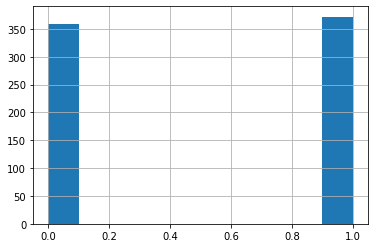

In [ ]:
df.success.hist();

Checking that all the data between 0 and 1

In [ ]:
(df[['temp', 'atemp', 'hum', 'windspeed', 'weekday','success']]<0).sum() + (1<df[['temp', 'atemp', 'hum', 'windspeed', 'weekday','success']]).sum()

temp         0
atemp        0
hum          0
windspeed    0
weekday      0
success      0
dtype: int64

Taking a look at correlations:

In [ ]:
df[['temp', 'atemp', 'hum', 'windspeed', 'weekday','success']].corr()

,temp,atemp,hum,windspeed,weekday,success
temp,1.000000,0.991702,0.126963,-0.157944,-0.000170,0.537548
atemp,0.991702,1.000000,0.139988,-0.183643,-0.007537,0.535147
hum,0.126963,0.139988,1.000000,-0.248489,-0.052232,-0.110768
windspeed,-0.157944,-0.183643,-0.248489,1.000000,0.014282,-0.194757
weekday,-0.000170,-0.007537,-0.052232,0.014282,1.000000,0.042366
success,0.537548,0.535147,-0.110768,-0.194757,0.042366,1.000000


Although not specified in instructions, we would probably drop "atemp" due to the high correlation rate with "temp".
 

Create a Train&Test set: (70-30)

In [ ]:
X = df[['temp', 'atemp','hum', 'windspeed', 'weekday']].to_numpy()
y = df.success.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# fixing X shapes 
X_train = X_train.T
X_test = X_test.T

# fixing y shapes
y_train = y_train[np.newaxis,:]
y_test = y_test[np.newaxis,:]

X_train.shape,y_train.shape, X_test.shape,y_test.shape

((5, 511), (1, 511), (5, 220), (1, 220))

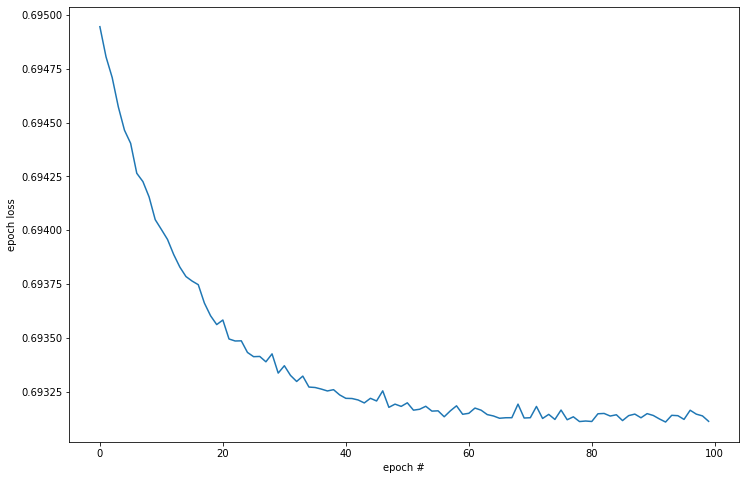

In [ ]:
nn = MyNN(0.01, [5, 40, 30, 10, 7, 5, 3, 1])

batch_size = 8
epochs = 100

history = train(X_train, y_train, epochs, batch_size,verbose=False)

plt.figure(figsize=(12,8))
plt.plot(history)
plt.xlabel('epoch #')
plt.ylabel('epoch loss')
plt.show();

Overall there is an improvent in the Loss value.

**Predict on test set:**

In [ ]:
pred = nn.forward_batch(X_test)
pred.shape, y_test.shape

((1, 220), (1, 220))

**ROC Curve:**

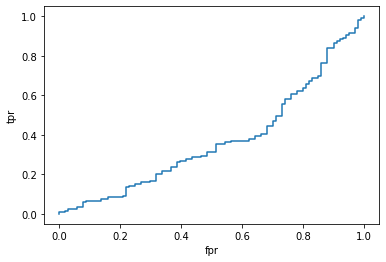

AUC= 0.36958149596472256


In [ ]:
pred = pred[0]
y_test = y_test[0]

fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

auc = roc_auc_score(y_test, pred)
print("AUC=", auc)

**Confution matrix:**

This is definitely not the optimal threshhold :) 

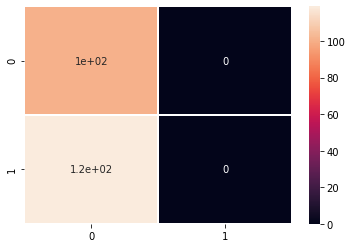

              precision    recall  f1-score   support

         0.0       0.46      1.00      0.63       101
         1.0       0.00      0.00      0.00       119

    accuracy                           0.46       220
   macro avg       0.23      0.50      0.31       220
weighted avg       0.21      0.46      0.29       220



In [ ]:


# some threshold
threshold =0.49671683
y_pred = pred > threshold   

# confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,  annot=True, linewidth=0.5)
plt.show()

# report
print(classification_report(y_test,y_pred))

# Conclusions
- We need a better LR (adaptive)  
- We need to set a better threshold   
- We need to keep the Ws small (L1 regularization)   
- We need to help the network generalize (Dropout, etc.) 
